In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic = pd.read_csv('./titanic.csv')
titanic.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


(array([492., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

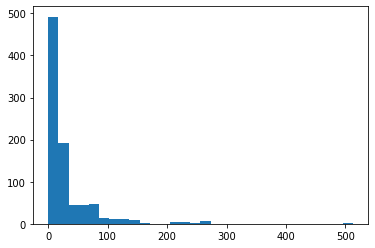

In [6]:
plt.hist(titanic['Fare'], bins=30)
#plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

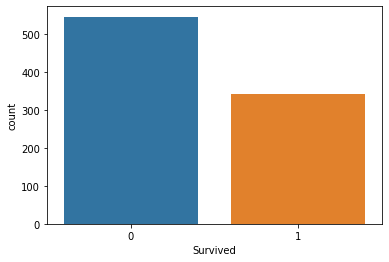

In [18]:
sns.countplot(x='Survived', data=titanic)

Задание 4.11.1  
1 point possible (graded)  
Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance', затем избавьтесь от пропусков.  

Обучим модель на несбалансированных данных. Целевой переменной будет 'compliance', разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания.  

Обучите DecisionTreeClassifier из scikit-learn с параметром random_state=23. Посчитайте значения метрики F1 на тренировочной выборке и на тестовой выборке.  

Затем сделайте эту же выборку сбалансированной с помощью undersampling.  

Для этого посчитайте количество примеров (n) класса-меньшинства, затем из класса-большинства возьмите n первых примеров.  

То есть, в терминологии Python, возьмите срез (slice) от начала и до n, где n — количество примеров класса, которого в выборке представлено меньше.  

Соедините две части выборки (с уменьшенным классом-большинством и с изначальным классом-меньшинством), сделайте точно такое же разбиение, как в задаче выше, и обучите такую же модель.  

Посчитайте значение метрики F1 на новой тестовой выборке с помощью новой модели. Вычтите из значения метрики на тестовой части сбалансированной выборки значение метрики на тестовой части несбалансированной выборки и запишите результат в переменную result.

In [29]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

data = pd.read_csv('./train.csv', encoding = 'ISO-8859-1', low_memory=False)
data.tail()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
250301,325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250302,325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250303,325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250304,325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250305,325561,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [30]:
data = data[['fine_amount', 'state_fee', 'late_fee',\
             'discount_amount', 'balance_due', 'compliance']].dropna()

<AxesSubplot:xlabel='compliance', ylabel='count'>

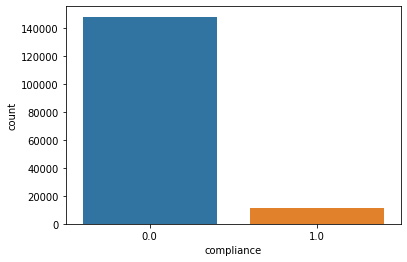

In [36]:
sns.countplot(x='compliance', data=data)

In [44]:
X = np.array(data.drop('compliance', axis=1))
y = np.array(data['compliance'])
clf = DecisionTreeClassifier(random_state=23)

def f1_scr(X,y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    f1_train = f1_score(y_train, y_pred_train)
    y_pred_valid = clf.predict(X_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)
    print(f'[train] F1-score = {f1_train:.2f}\n[valid] F1_score = {f1_valid:.2f}')
    return f1_valid

f1_default = f1_scr(X,y)


[train] F1-score = 0.66
[valid] F1_score = 0.58


In [78]:
n_count = data['compliance'].value_counts(ascending=True).iloc[0]
new_data = pd.concat([data[data['compliance']==0].iloc[:n_count], data[data['compliance']==1]])
new_data = new_data.sort_index()
X = np.array(new_data.drop('compliance', axis=1))
y = np.array(new_data['compliance'])
f1_undersamp = f1_scr(X,y)

result = f1_undersamp - f1_default

[train] F1-score = 0.92
[valid] F1_score = 0.76
